In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/MyDrive/Dataset'

In [5]:
# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

In [6]:
# Create ImageDataGenerators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_path + '/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Assuming binary classification (Pneumonia and Normal)
)

Found 5216 images belonging to 2 classes.


In [8]:
validation_generator = test_datagen.flow_from_directory(
    base_path + '/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
    base_path + '/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [10]:
# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

In [11]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=5,  # You can adjust the number of epochs based on model performance
    validation_data=validation_generator
)


Epoch 1/5
163/163 [==============================] - 550s 3s/step - loss: 0.3320 - accuracy: 0.8533 - val_loss: 0.4587 - val_accuracy: 0.8125
Epoch 2/5
163/163 [==============================] - 90s 555ms/step - loss: 0.2690 - accuracy: 0.8890 - val_loss: 0.7702 - val_accuracy: 0.6250
Epoch 3/5
163/163 [==============================] - 90s 550ms/step - loss: 0.2375 - accuracy: 0.9036 - val_loss: 0.6267 - val_accuracy: 0.7500
Epoch 4/5
163/163 [==============================] - 89s 549ms/step - loss: 0.2235 - accuracy: 0.9103 - val_loss: 0.9216 - val_accuracy: 0.6250
Epoch 5/5
163/163 [==============================] - 91s 558ms/step - loss: 0.2065 - accuracy: 0.9176 - val_loss: 0.4459 - val_accuracy: 0.8750


In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

19/19 [==============================] - 119s 7s/step - loss: 0.3437 - accuracy: 0.8470
Test Accuracy: 84.70%


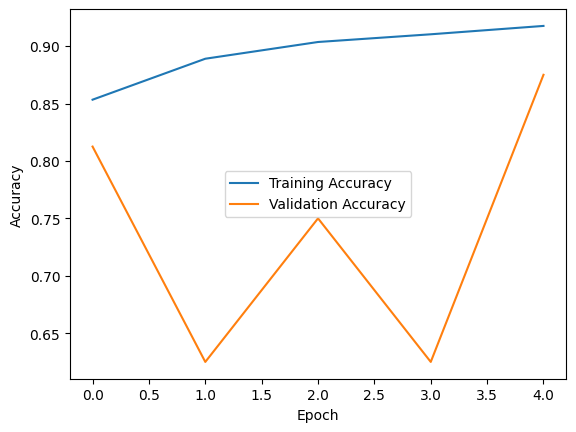

In [16]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()